## Pokemon Stats Analysis and ML Project

### Import Libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

### Load Data

In [149]:
pokemon_df = pd.read_csv('data/pokemon.csv')
pokemon_df.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

### Exploratory Data Analysis

In [150]:
# Check nulls and dtypes
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [151]:
pokemon_df.isnull().mean()

#             0.0000
Name          0.0000
Type 1        0.0000
Type 2        0.4825
Total         0.0000
HP            0.0000
Attack        0.0000
Defense       0.0000
Sp. Atk       0.0000
Sp. Def       0.0000
Speed         0.0000
Generation    0.0000
Legendary     0.0000
dtype: float64

In [152]:
# Display summary statistics
pokemon_df.describe()

#      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%     50.000000   45.000000     2.00000  
50%     70.000000   65.000000     3.00000  
75%     90.000000   90.000000     5.00000  
max    230.000000  180.000000     6.00000

#### Data Cleaning

In [153]:
# Fill NA's for `Type 2`
pokemon_df['Type 2'] = pokemon_df['Type 2'].fillna('')

# Drop unecessary coluns
pokemon = pokemon_df.drop(['#','Total', 'Generation', 'Legendary'], axis=1)
pokemon.head(2)

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0  Bulbasaur  Grass  Poison  45      49       49       65       65     45
1    Ivysaur  Grass  Poison  60      62       63       80       80     60

#### Statistical Analysis

In [154]:
# Mean and Median of Attack and Defense
mean_attack = pokemon.Attack.mean()
mean_defense = pokemon.Defense.mean()
median_attack = pokemon.Attack.median()
median_defense = pokemon.Defense.median()

print(f"Mean Attack: {mean_attack:.2f}")
print(f"Mean Defense: {mean_defense:.2f}")
print(f"Median Attack: {median_attack:.2f}")
print(f"Median Defense: {median_defense:.2f}")

Mean Attack: 79.00
Mean Defense: 73.84
Median Attack: 75.00
Median Defense: 70.00


In [155]:
# Mean and Median of HP and Speed
mean_hp = pokemon.HP.mean()
mean_speed = pokemon.Speed.mean()
median_hp = pokemon.HP.median()
median_speed = pokemon.Speed.median()

print(f"Mean Attack: {mean_hp:.2f}")
print(f"Mean Defense: {mean_speed:.2f}")
print(f"Median Attack: {median_hp:.2f}")
print(f"Median Defense: {median_speed:.2f}")

Mean Attack: 69.26
Mean Defense: 68.28
Median Attack: 65.00
Median Defense: 65.00


In [156]:
# Standard Deviations
std_attack = pokemon.Attack.std()
std_defense = pokemon.Defense.std()
std_hp = pokemon.HP.std()
std_speed = pokemon.Speed.std()

print(f"Standard Deviatoin of Attack: {std_attack:.2f}")
print(f"Standard Deviatoin of Defense: {std_defense:.2f}")
print(f"Standard Deviatoin of HP: {std_hp:.2f}")
print(f"Standard Deviatoin of Speed: {std_speed:.2f}")

Standard Deviatoin of Attack: 32.46
Standard Deviatoin of Defense: 31.18
Standard Deviatoin of HP: 25.53
Standard Deviatoin of Speed: 29.06


#### Data Visualizations

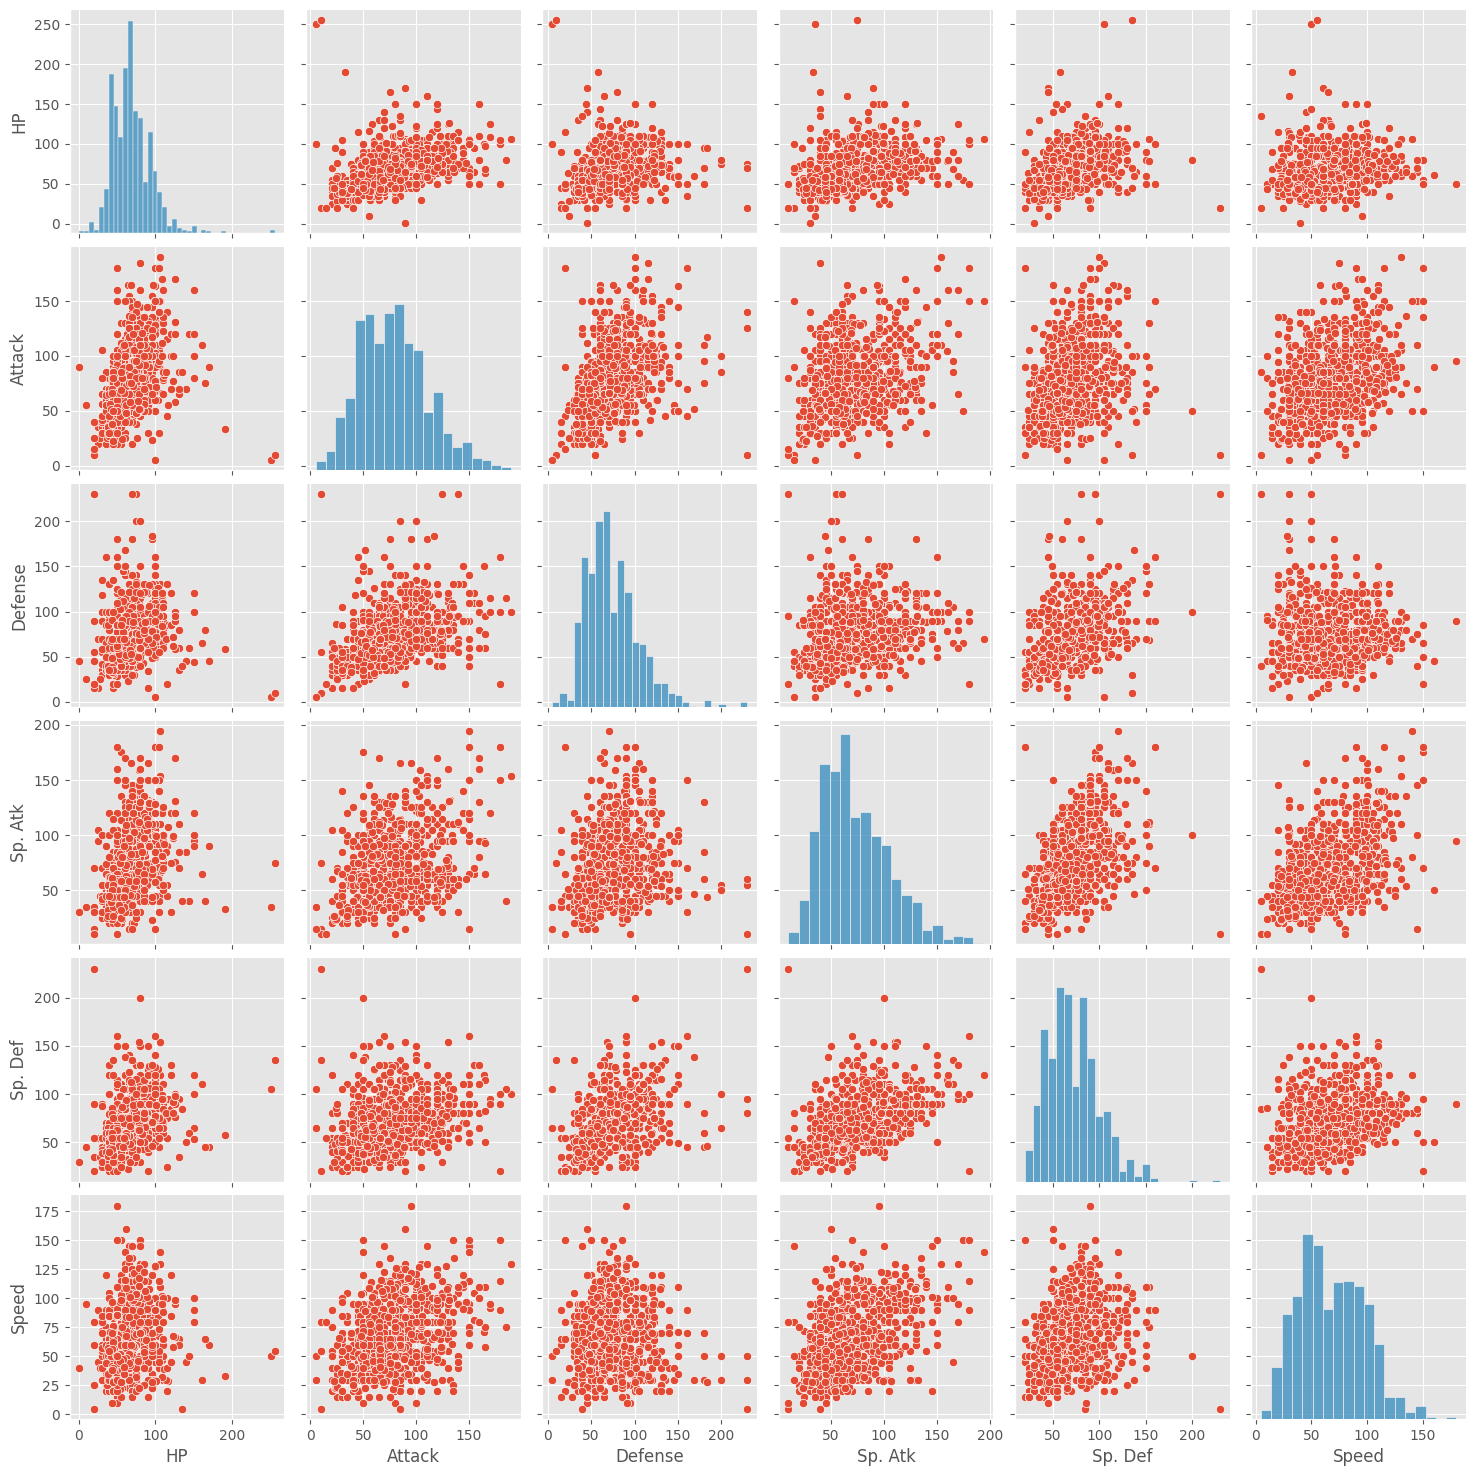

In [157]:
# Create pair plot to explore relatonship between variables
sns.pairplot(data=pokemon)

c:\Users\JacobJohnson\anaconda3\envs\vizenv\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: title={'center': 'Feature Distribution'}>

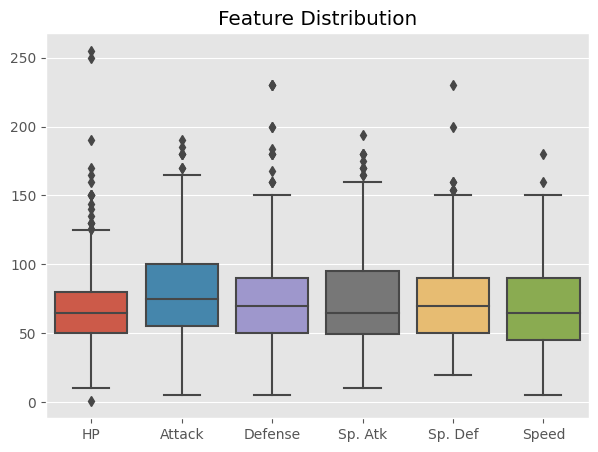

In [158]:
# Create boxplot so show the distributions of our features
plt.figure(figsize=(7, 5))
plt.title("Feature Distribution")
sns.boxplot(data=pokemon)

In [159]:
pokemon.groupby(['Type 1'])["Attack", "Defense", "Speed"].mean()

C:\Users\JacobJohnson\AppData\Local\Temp\ipykernel_31612\273746851.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pokemon.groupby(['Type 1'])["Attack", "Defense", "Speed"].mean()


Attack     Defense       Speed
Type 1                                      
Bug        70.971014   70.724638   61.681159
Dark       88.387097   70.225806   76.161290
Dragon    112.125000   86.375000   83.031250
Electric   69.090909   66.295455   84.500000
Fairy      61.529412   65.705882   48.588235
Fighting   96.777778   65.925926   66.074074
Fire       84.769231   67.769231   74.442308
Flying     78.750000   66.250000  102.500000
Ghost      73.781250   81.187500   64.343750
Grass      73.214286   70.800000   61.928571
Ground     95.750000   84.843750   63.906250
Ice        72.750000   71.416667   63.458333
Normal     73.469388   59.846939   71.551020
Poison     74.678571   68.821429   63.571429
Psychic    71.456140   67.684211   81.491228
Rock       92.863636  100.795455   55.909091
Steel      92.703704  126.370370   55.259259
Water      74.151786   72.946429   65.964286

<AxesSubplot: title={'center': 'Type 1 Attack Distribution'}, xlabel='Attack', ylabel='Type 1'>

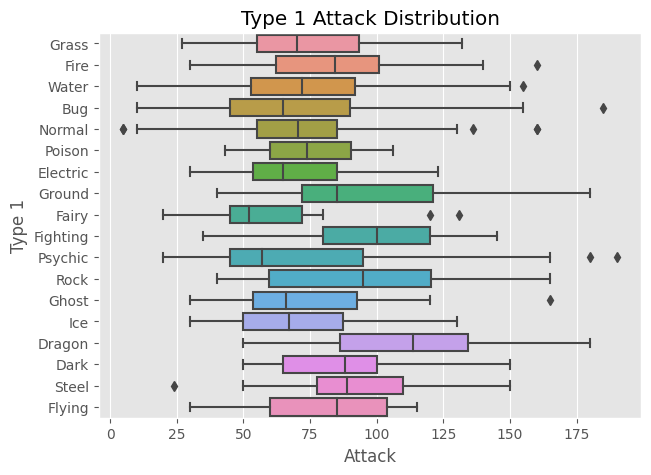

In [160]:
# Create boxplot so show the distributions of Type 1 Attack stats
plt.figure(figsize=(7, 5))
plt.title("Type 1 Attack Distribution")
sns.boxplot(data=pokemon, x="Attack", y="Type 1")

<AxesSubplot: title={'center': 'Type 2 Attack Distribution'}, xlabel='Attack', ylabel='Type 2'>

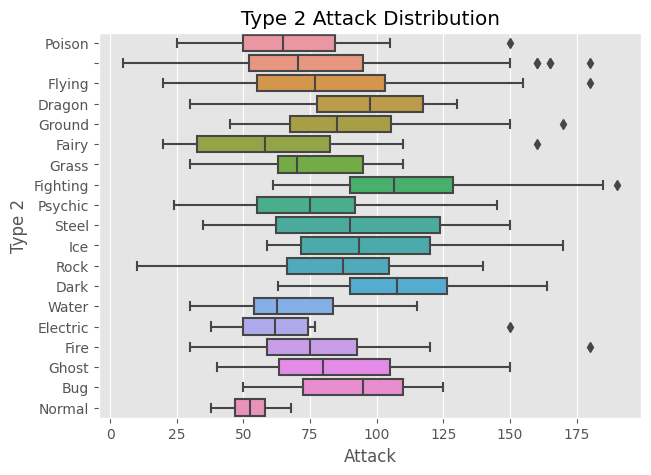

In [161]:
# Create boxplot so show the distributions of Type 2 Attack stats
plt.figure(figsize=(7, 5))
plt.title("Type 2 Attack Distribution")
sns.boxplot(data=pokemon, x="Attack", y="Type 2")

<AxesSubplot: title={'center': 'Type 1 Defense Distribution'}, xlabel='Defense', ylabel='Type 1'>

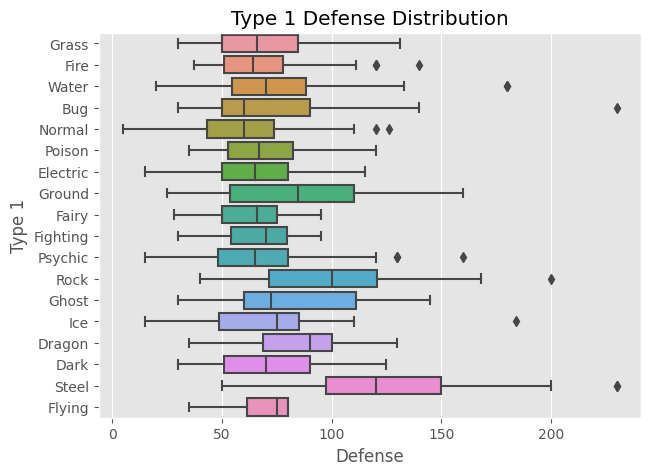

In [162]:
# Create boxplot so show the distributions of Type 1 Defense stats
plt.figure(figsize=(7, 5))
plt.title("Type 1 Defense Distribution")
sns.boxplot(data=pokemon, x="Defense", y="Type 1")

<AxesSubplot: title={'center': 'Type 2 Defense Distribution'}, xlabel='Defense', ylabel='Type 2'>

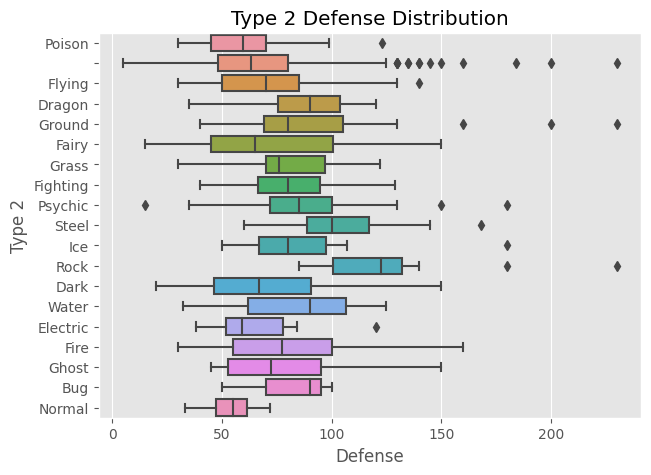

In [163]:
# Create boxplot so show the distributions of Type 2 Attack stats
plt.figure(figsize=(7, 5))
plt.title("Type 2 Defense Distribution")
sns.boxplot(data=pokemon, x="Defense", y="Type 2")

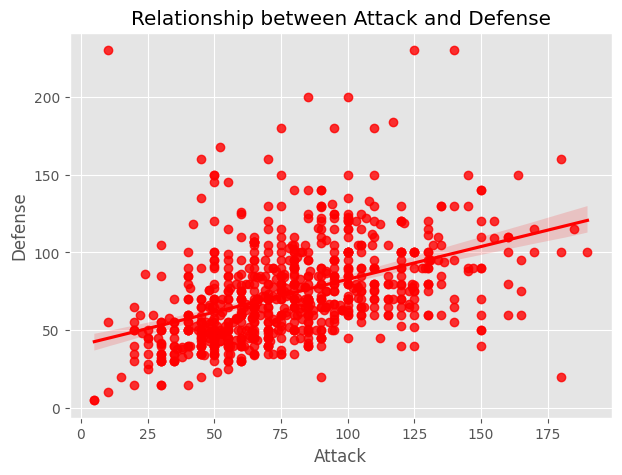

In [164]:
# Create scatter plot plot to show relationship between attack and defense
plt.figure(figsize=(7, 5))
plt.title("Relationship between Attack and Defense")
sns.regplot(data=pokemon, x="Attack", y="Defense", color="r")
plt.show()

C:\Users\JacobJohnson\AppData\Local\Temp\ipykernel_31612\2438730780.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = pokemon.corr()


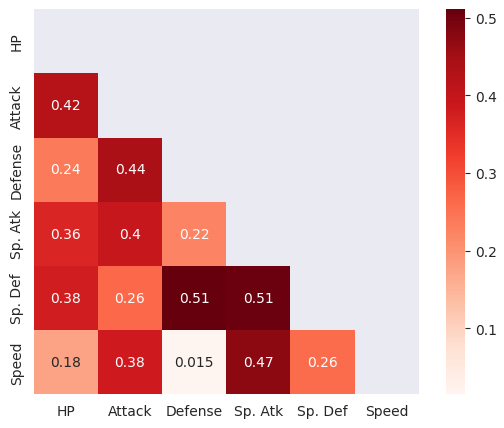

In [165]:
# Using Pearson Correlation to find relation between our variables
corr = pokemon.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("darkgrid"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, square=True, cmap='Reds', annot=True)

In [166]:
# Group pokemon by type and and find the statistical averages
stats_avg = pokemon.groupby(['Type 1'])["HP", "Attack", "Defense", "Speed", "Sp. Atk", "Sp. Def"].mean().reset_index()
stats_avg_2 = pokemon.groupby(['Type 2'])["HP", "Attack", "Defense", "Speed", "Sp. Atk", "Sp. Def"].mean().reset_index()
stats_avg.head()

C:\Users\JacobJohnson\AppData\Local\Temp\ipykernel_31612\1086365847.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stats_avg = pokemon.groupby(['Type 1'])["HP", "Attack", "Defense", "Speed", "Sp. Atk", "Sp. Def"].mean().reset_index()
C:\Users\JacobJohnson\AppData\Local\Temp\ipykernel_31612\1086365847.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stats_avg_2 = pokemon.groupby(['Type 2'])["HP", "Attack", "Defense", "Speed", "Sp. Atk", "Sp. Def"].mean().reset_index()


Type 1         HP      Attack    Defense      Speed    Sp. Atk    Sp. Def
0       Bug  56.884058   70.971014  70.724638  61.681159  53.869565  64.797101
1      Dark  66.806452   88.387097  70.225806  76.161290  74.645161  69.516129
2    Dragon  83.312500  112.125000  86.375000  83.031250  96.843750  88.843750
3  Electric  59.795455   69.090909  66.295455  84.500000  90.022727  73.704545
4     Fairy  74.117647   61.529412  65.705882  48.588235  78.529412  84.705882

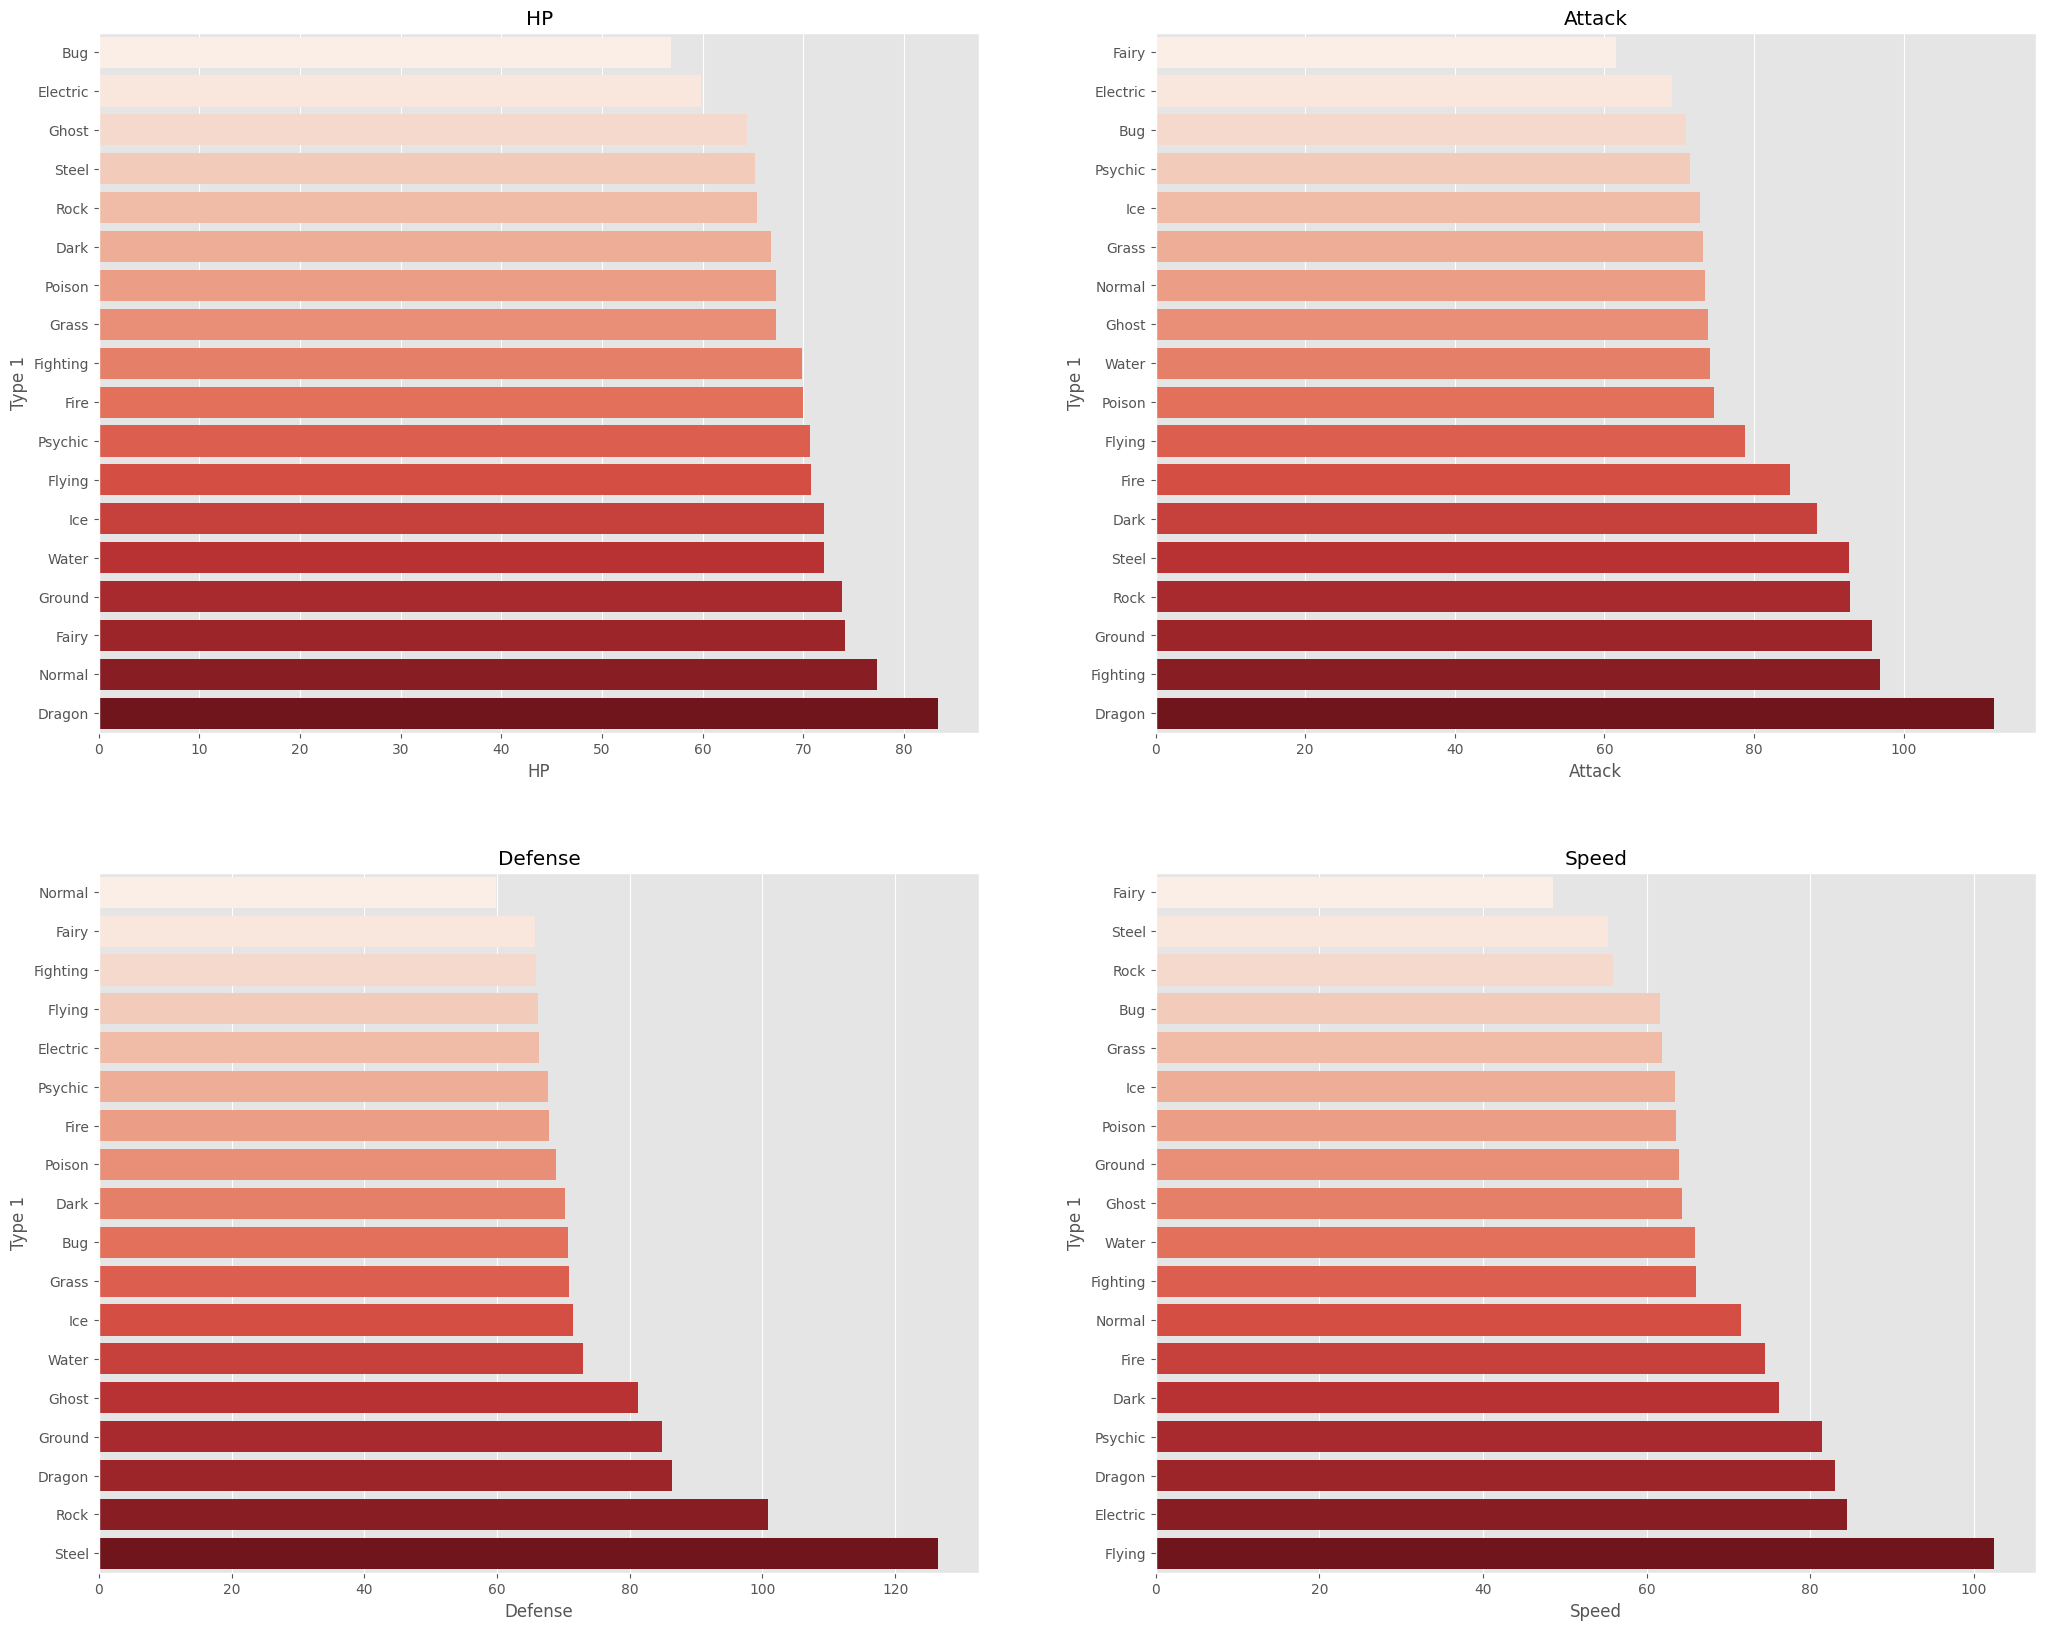

In [167]:
# Create barplots for Pokemon stats by type 1
plt.figure(figsize=(25, 20))

features = ['HP', 'Attack', 'Defense', 'Speed']
target = stats_avg['Type 1']

for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    x = stats_avg[col]
    y = target
    sns.barplot(data=stats_avg, x=x, y=y, 
        order=stats_avg.sort_values(col)['Type 1'],
        palette="Reds")
    plt.title(col)
    plt.xlabel(col)

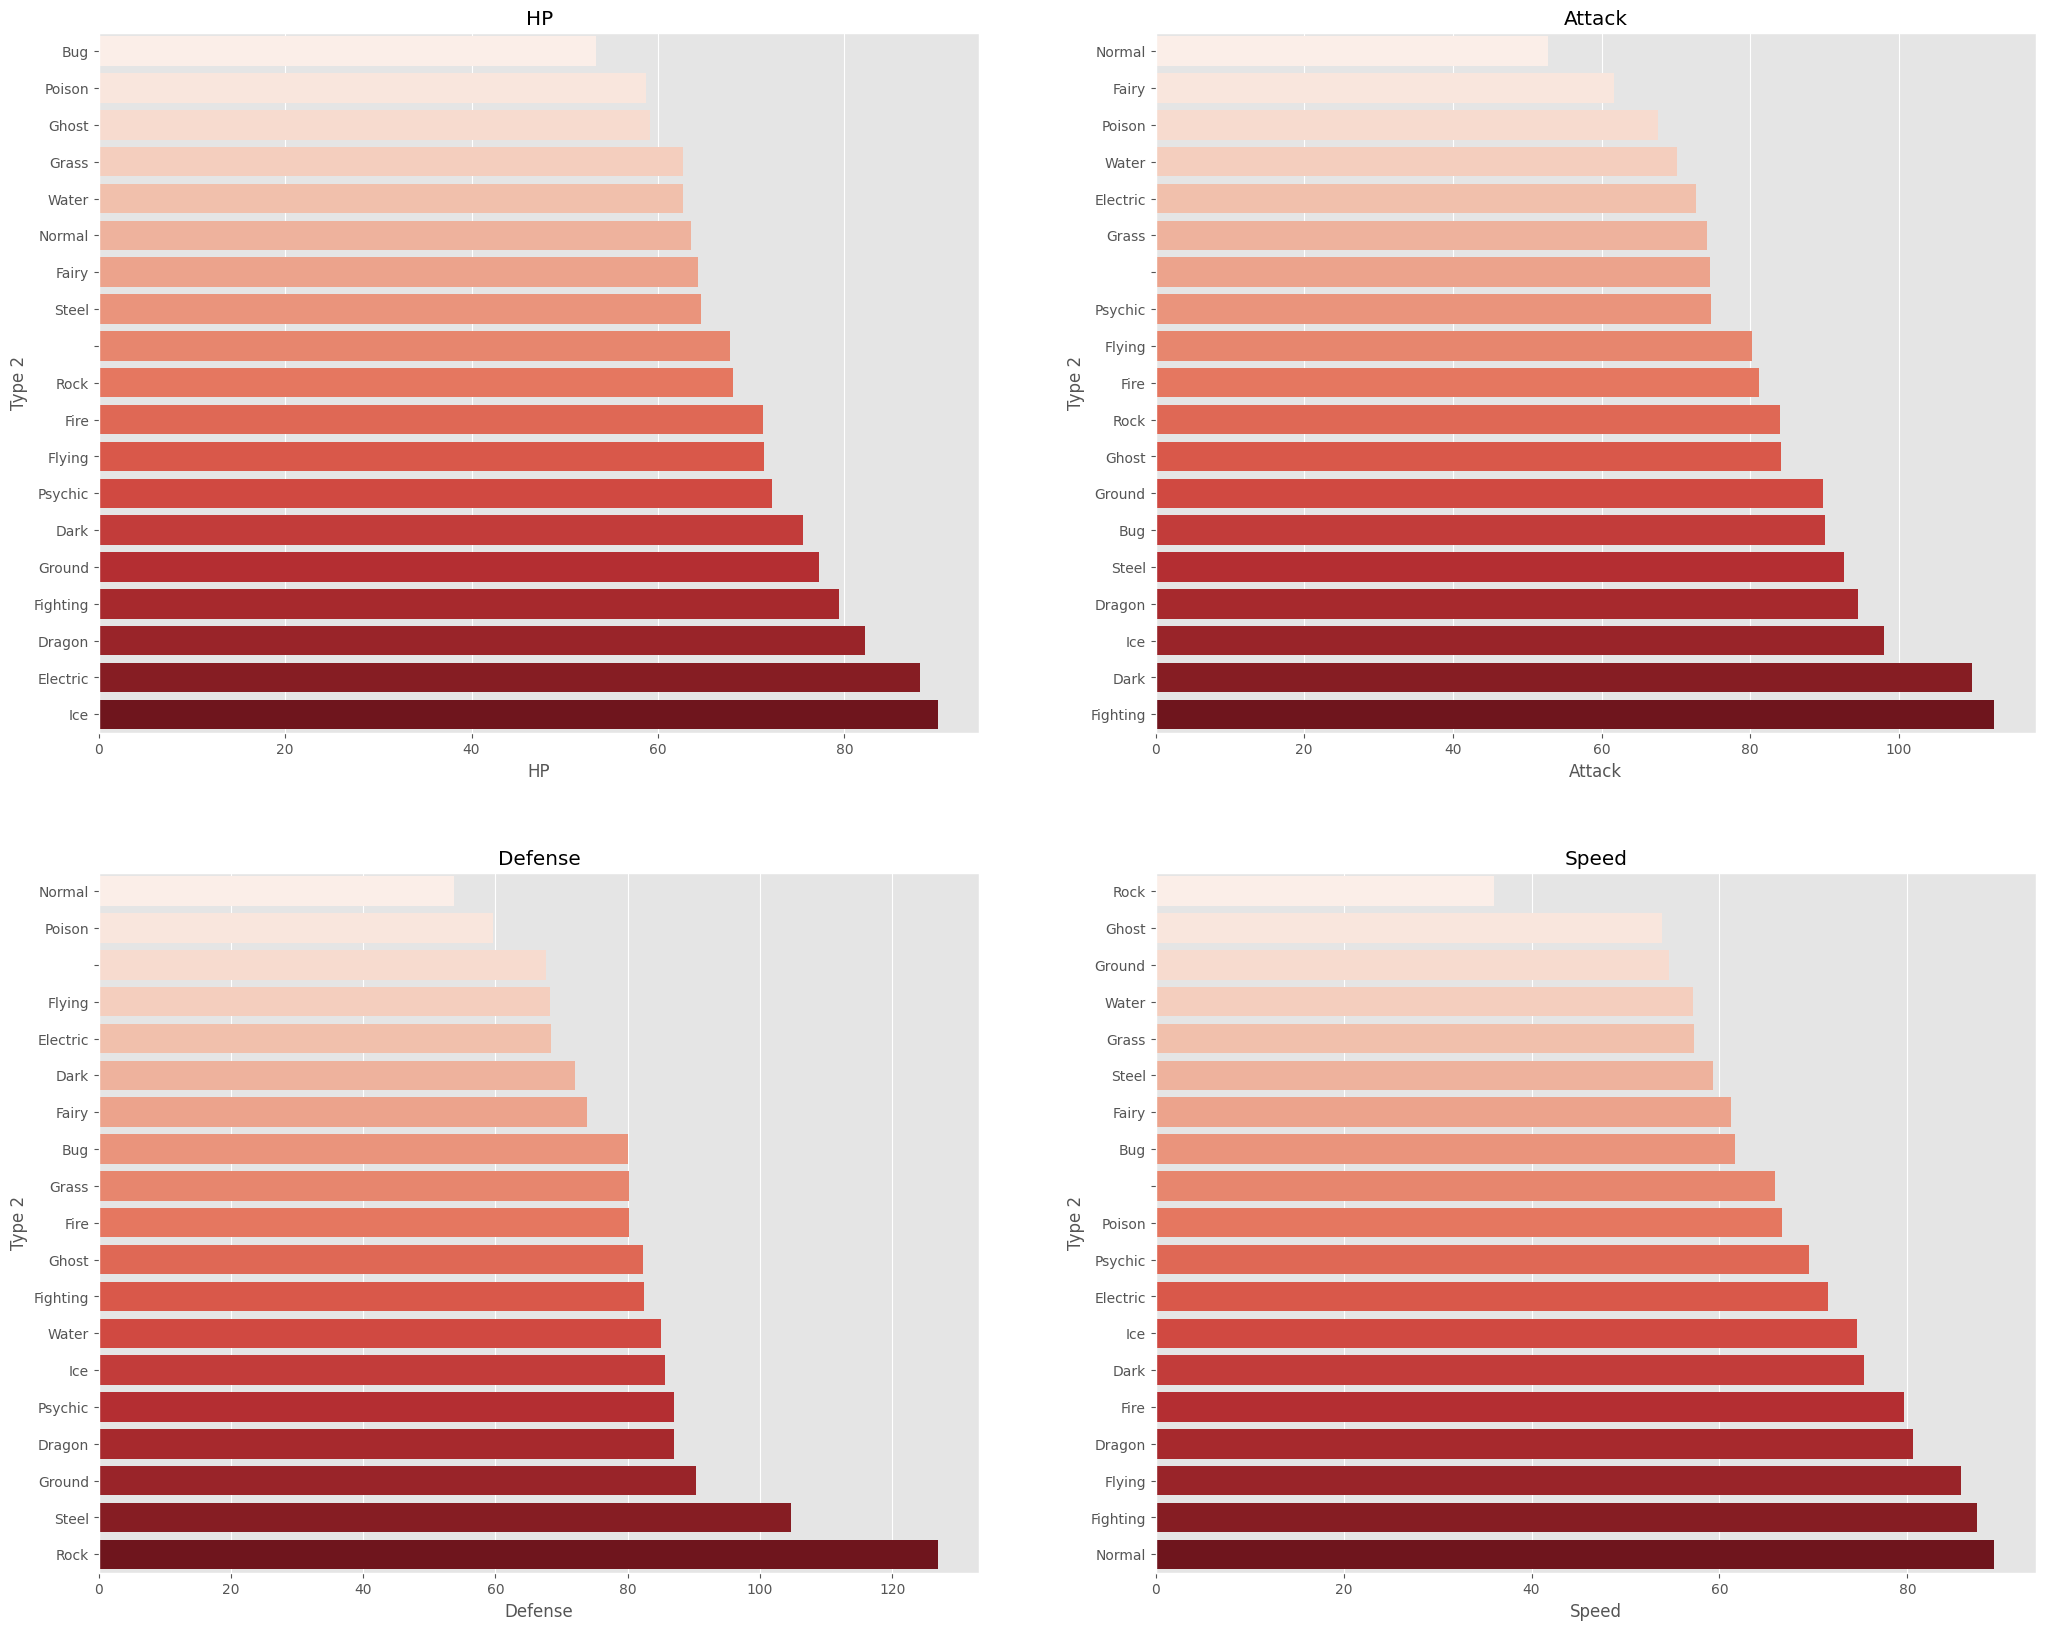

In [168]:
# Create barplots for Pokemon stats by type 2
plt.figure(figsize=(25, 20))

features = ['HP', 'Attack', 'Defense', 'Speed']
target = stats_avg_2['Type 2']

for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    x = stats_avg_2[col]
    y = target
    sns.barplot(data=stats_avg_2, x=x, y=y, 
        order=stats_avg_2.sort_values(col)['Type 2'],
        palette="Reds")
    plt.title(col)
    plt.xlabel(col)